In [73]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")

In [74]:
# read data 
data = pd.read_csv("student-por.csv")

### **Magic 1 : To Grouping the Feature based on which data Type they are contain**

In [75]:

''' 
    If we have very large number of feature we use this code for sepeating or grouping the feature base on which data type they have to contain 
'''
# it very complex to which feature contain specific data type
def to_check_data_type_of_specific_feature(data):
    data_type_of_all_feature = data.dtypes 
    data_type_Frame = pd.DataFrame(data_type_of_all_feature,columns=["Data Type"])
    
    unique_data_type = data_type_Frame["Data Type"].unique()
    
    data_types_dict = dict()
    for i in range(len(unique_data_type)):
        # print(f"Data Type : {unique_data_type[i]} : {[j for j in data.columns if data[j].dtype== unique_data_type[i] ]}")
        
        data_types_dict[unique_data_type[i]]= [j for j in data.columns if data[j].dtype== unique_data_type[i]]
    
    # print(data_types_dict)
    
    return data_types_dict


In [76]:
def to_cheak_null_duplicated(data):
    pass

###

In [77]:
print(to_check_data_type_of_specific_feature(data))

{dtype('O'): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], dtype('int64'): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']}


In [78]:
# print(data.isnull().sum())

In [79]:
data.duplicated().sum()

0

In [80]:
data.shape

(649, 33)

#### 1. School(University) Feature 

Value Count Of :
 
GP    423
MS    226
Name: school, dtype: int64


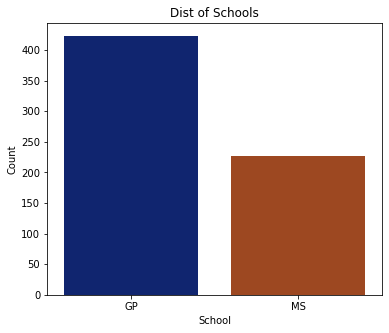

In [136]:
# 
print(f"Value Count Of :\n \n{data['school'].value_counts()}")

plt.figure(figsize=(6,5))
sns.countplot(x="school",data = data,palette="dark")
plt.title('Dist of Schools')
plt.xlabel('School')
plt.ylabel('Count')
plt.show()

In [83]:
# Age Range 
print(f"Age Range Of Main data is {data['age'].min()} to {data['age'].max()}")
print(f"Value Count Of Age is : \n\n{data['age'].value_counts()}")

Age Range Of Main data is 15 to 22
Value Count Of Age is : 

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64


### Breack the data into two part which based of school 

In [84]:
gp_school_data = data[data["school"]=="GP"]
ms_school_data = data[data["school"]=="MS"]

In [85]:
print(f"GP School Shape : {gp_school_data.shape} \nMS School Shape{ms_school_data.shape}")

GP School Shape : (423, 33) 
MS School Shape(226, 33)


##### GP School 

In [86]:
print(f" Age Range Of Main data is {data['age'].min()} to {data['age'].max()}")
print(f" GP School having Age Range : {gp_school_data['age'].min()} to {gp_school_data['age'].max()}")
print(f" MS School having Age Range : {ms_school_data['age'].min()} to {ms_school_data['age'].max()}")

# Remark : The 3 student which have age more than 20 is belonging to GP School.
print("\n:-> Remark : The 3 student which have age more than 20 is belonging to GP School.")

 Age Range Of Main data is 15 to 22
 GP School having Age Range : 15 to 22
 MS School having Age Range : 15 to 20

:-> Remark : The 3 student which have age more than 20 is belonging to GP School.


In [88]:
gp_reason_value_counts = gp_school_data['reason'].value_counts()
# print(gp_reason[3])
gp_reason_value_counts

course        167
home          115
reputation    114
other          27
Name: reason, dtype: int64

## **Magic 2 : To Calculate Percentage Of Value_count()**

In [89]:
def to_calculate_percentage_of_value_count(data):
    
    # To calculate Value Count
    value_count = data.value_counts()
    
    # Make local variable to store the data for performing operations
    percentage_in_value_count_dict = dict(value_count)
    divisor = data.shape[0]
     
    key = percentage_in_value_count_dict.keys()
    
    for i in key:
        l = [percentage_in_value_count_dict[i]]
        percentage = round((percentage_in_value_count_dict[i]/divisor)*100,2)
        l.append(percentage)
        percentage_in_value_count_dict[i] = l
        
    # print(percentage_in_value_count_dict)
    
    return percentage_in_value_count_dict

In [90]:
print(f"Mostly Reason for choosing School is \n{to_calculate_percentage_of_value_count(data['reason'])}\n\n")
print(f"Mosly choose GP school because of this reason\n{to_calculate_percentage_of_value_count(gp_school_data['reason'])}\n\n")
print(f"Mosly choose GP school because of this reason \n{to_calculate_percentage_of_value_count(ms_school_data['reason'])}")


print(f"\n\n:-> Remark : GP school exit very main location compare to MS but MS school provide better courses compare to GP school.")
# :-> Remark : GP school exit very main location compare to MS but MS school provide better courses compare to GP school.

Mostly Reason for choosing School is 
{'course': [285, 43.91], 'home': [149, 22.96], 'reputation': [143, 22.03], 'other': [72, 11.09]}


Mosly choose GP school because of this reason
{'course': [167, 39.48], 'home': [115, 27.19], 'reputation': [114, 26.95], 'other': [27, 6.38]}


Mosly choose GP school because of this reason 
{'course': [118, 52.21], 'other': [45, 19.91], 'home': [34, 15.04], 'reputation': [29, 12.83]}


:-> Remark : GP school exit very main location compare to MS but MS school provide better courses compare to GP school.


##

#### reason Feature

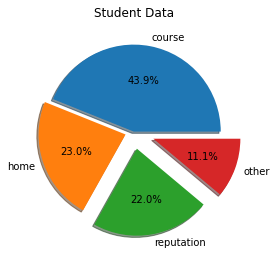

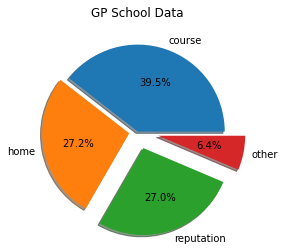

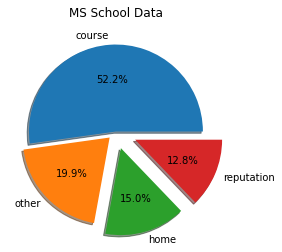

# :-> Remark : GP school exit very main location compare to MS but MS school provide better courses compare to GP school.


In [134]:
# Using Pie Chart calculate Percentage 

plt.title("Student Data")
reason = data['reason'].value_counts()
plt.pie(reason, labels = reason.index, autopct='%1.1f%%',explode =[0.0,0.1,0.2,0.24],shadow=True)
plt.show()

plt.title("GP School Data") 
reason = gp_school_data['reason'].value_counts()
plt.pie(reason, labels = reason.index, autopct='%1.1f%%',explode =[0.0,0.1,0.2,0.24],shadow=True)
plt.show()
 
plt.title("MS School Data")
reason = ms_school_data['reason'].value_counts()
plt.pie(reason, labels = reason.index, autopct='%1.1f%%',explode =[0.0,0.1,0.2,0.24],shadow=True)
plt.show()

print(f"# :-> Remark : GP school exit very main location compare to MS but MS school provide better courses compare to GP school.")

# :-> Remark : GP school exit very main location compare to MS but MS school provide better courses compare to GP school.

#### Gender Feature

Value Count Of Gender each School 
 GP School : 
F    237
M    186
Name: sex, dtype: int64

 MS School : 
F    146
M     80
Name: sex, dtype: int64


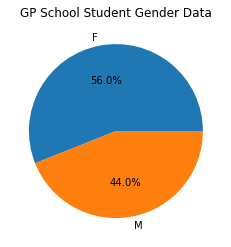

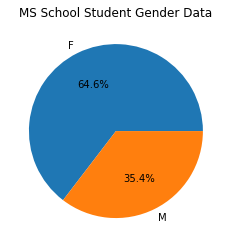

# :-> Remark : Both school having more female student


In [92]:
# value Count Of Sex feature
print(f"Value Count Of Gender each School \n GP School : \n{gp_school_data['sex'].value_counts()}\n\n MS School : \n{ms_school_data['sex'].value_counts()}")
plt.title("GP School Student Gender Data")
reason = gp_school_data['sex'].value_counts()
plt.pie(reason, labels = reason.index, autopct='%1.1f%%')
plt.show()

plt.title("MS School Student Gender Data")
reason = ms_school_data['sex'].value_counts()
plt.pie(reason, labels = reason.index, autopct='%1.1f%%')
plt.show()

print(f"# :-> Remark : Both school having more female student")

# :-> Remark : Both school having more female student 

#### Age Feature 

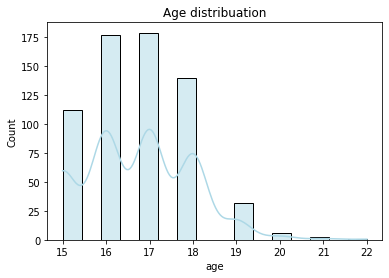

In [93]:
# sns.distplot(data['age'])
sns.histplot(data=data["age"],kde=True,color="lightblue")
plt.title("Age distribuation")
plt.show()

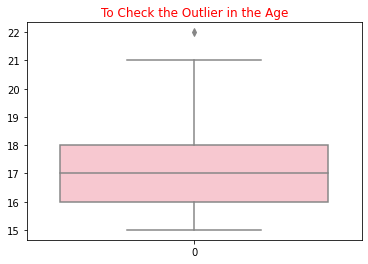

In [94]:
sns.boxplot(data=data["age"],color='pink')
plt.title("To Check the Outlier in the Age",color='red')
plt.show()

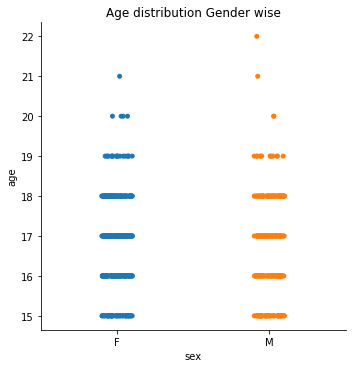

# :-> Remark : There is Boy which has age 22 year old which act as outlier in dataset, Magority student lie between age 16 to 18 


In [95]:
sns.catplot(x="sex",y="age",data=data,hue='sex')
plt.title("Age distribution Gender wise")
plt.show() 


print(f"# :-> Remark : There is Boy which has age 22 year old which act as outlier in dataset, Magority student lie between age 16 to 18 ")

# :-> Remark : There is Boy which has age 22 year old which act as outlier in dataset, Magority student lie between age 16 to 18 

#### Address Feature

Analysis Address For understanding Popularity Sector/Area

Overview Of All Address data 
U    452
R    197
Name: address, dtype: int64 


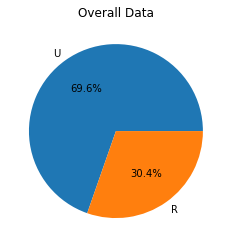

GP School Address Data Analys is : 
U    345
R     78
Name: address, dtype: int64


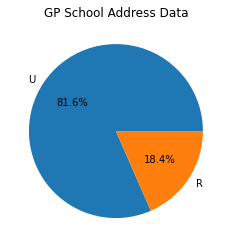

MS School Address Data Analys is : 
R    119
U    107
Name: address, dtype: int64


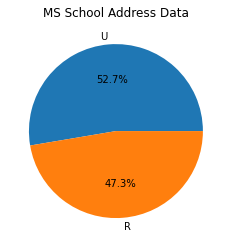

# :-> Remark : In GP School 81.6% student belonging to Urban Area Where In MS School 52.7% Urban Area. In MS school 47.3% student belong to  Rular Area In GP school 18.4% Student belong to Rular Area.


In [96]:
print(f"Analysis Address For understanding Popularity Sector/Area")
print(f"\nOverview Of All Address data \n{data['address'].value_counts()} ")

plt.title("Overall Data")
address = data["address"].value_counts()
plt.pie(address,labels=address.index,autopct='%1.1f%%')
plt.show()

 
# GP School Data
print(f"GP School Address Data Analys is : \n{gp_school_data['address'].value_counts()}")

plt.title("GP School Address Data")
gp_address = gp_school_data['address'].value_counts()
plt.pie(gp_address,labels=address.index,autopct='%1.1f%%')
plt.show()

# MS School Data
print(f"MS School Address Data Analys is : \n{ms_school_data['address'].value_counts()}")

plt.title("MS School Address Data")
ms_address = ms_school_data["address"].value_counts()
plt.pie(ms_address,labels=address.index,autopct='%1.1f%%')
plt.show()

print(f"# :-> Remark : In GP School 81.6% student belonging to Urban Area Where In MS School 52.7% Urban Area. In MS school 47.3% student belong to  Rular Area In GP school 18.4% Student belong to Rular Area.")

# :-> Remark : In GP School 81.6% student belonging to Urban Area Where In MS School 52.7% Urban Area. In MS school 47.3% student belong to  Rular Area In GP school 18.4% Student belong to Rular Area.


#### Marks Analysis

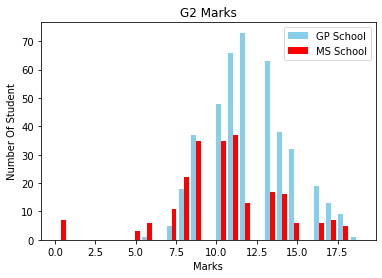

In [97]:
plt.hist([gp_school_data["G2"],ms_school_data["G2"]],bins=25,color=["skyblue","red"],rwidth=0.8,label=["GP School","MS School"])
plt.title("G2 Marks")
plt.xlabel("Marks")
plt.ylabel("Number Of Student")
plt.legend()
plt.show()

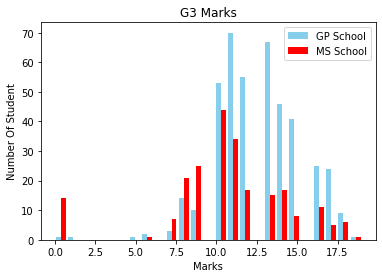

In [98]:
plt.hist([gp_school_data["G3"],ms_school_data["G3"]],bins=25,color=["skyblue","red"],rwidth=0.8,label=["GP School","MS School"])
plt.title("G3 Marks")
plt.xlabel("Marks")
plt.ylabel("Number Of Student")
plt.legend()
plt.show()

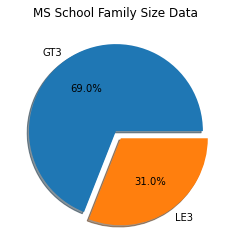

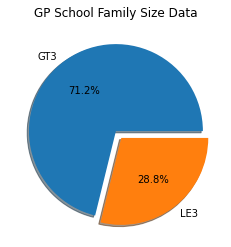

In [129]:
plt.title("MS School Family Size Data")
ms_address = ms_school_data["famsize"].value_counts()
plt.pie(ms_address,labels=ms_address.keys(),autopct='%1.1f%%',explode =[0.0,0.1],shadow=True)
plt.show()

plt.title("GP School Family Size Data")
ms_address = gp_school_data["famsize"].value_counts()
plt.pie(ms_address,labels=ms_address.keys(),autopct='%1.1f%%',explode =[0.0,0.1],shadow=True)
plt.show()

In [107]:
data["famsize"].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [138]:
corr = data.corr()

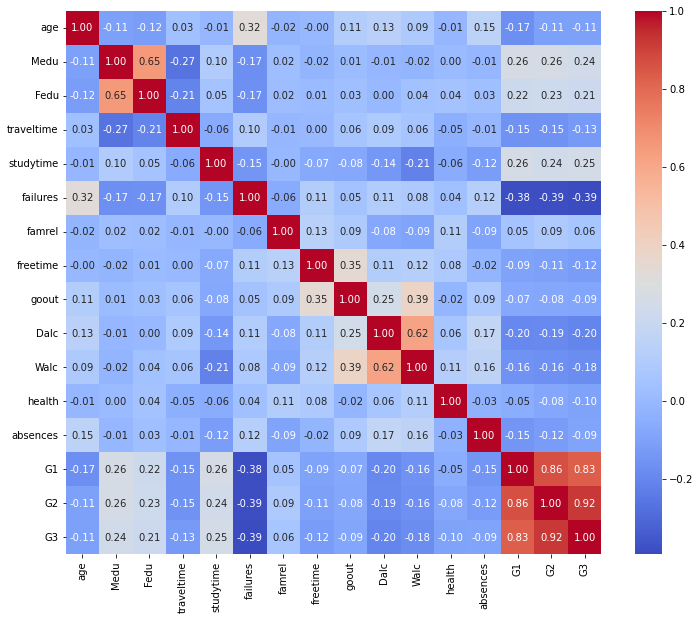

In [101]:
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot=True, cmap = "coolwarm", fmt = ".2f")
plt.show()

In [141]:
data.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
